In [1]:
import pandas as pd
import numpy as np
import collections

from sklearn.feature_extraction.text import TfidfVectorizer
from clustering_helpers import (article_clustering,
                                top_topic_words, 
                                gen_nmf_tfidf_model,
                                get_top_words)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in Data
df = pd.read_csv('../data/articles_categs.csv', index_col=0)

In [3]:
df.head()

,years,text_final,year,categ
0,1981 - 1984,Senate Republican leader tell White House offi...,1981,politics
1,1981 - 1984,House Senate conferee today kill Senate - appr...,1981,politics
2,1981 - 1984,"Senator Bob Dole , chairman tax - write Senate...",1983,politics
3,1981 - 1984,1981 tax act draw fire provision allow company...,1982,politics
4,1981 - 1984,Reagan Administration today forward 20-year_PO...,1982,politics


### Article Clustering
First we cluster all of the articles into different topics. Then we take the top words for each topic and treat each of those as separate documents, these documents are then clustered to find similar topics over time, to make the hand labeling of categories a quick process.

In [6]:
#initialize variables to be used to store analysis
intervals = [(int(i[:4]),int(i[-4:])) for i in df[df['categ']=='NAP']['years'].unique()]
interval_outputs, final_article_df = article_clustering(df[df['categ']=='NAP'], intervals)
final_article_df.head()

(1985, 1988)
(1993, 1996)
(2005, 2008)
(2009, 2012)
(1981, 1984)
(1989, 1992)
(2013, 2016)


,text_final,categ,years
2197,"housing price explode Manhattan , tremor shake...",5,1985 - 1988
2198,corner building Broadway 39th Street center te...,4,1985 - 1988
2199,drive sight river edge George Washington Bridg...,0,1985 - 1988
2200,strike begin week Long Island Rail Road unders...,7,1985 - 1988
2201,"Marianne Rusche Jane Reynolds , work Quail Rid...",3,1985 - 1988


In [7]:
final_topic_df = top_topic_words(interval_outputs, intervals)

In [8]:
pd.options.display.max_colwidth = 300
final_topic_df[['cluster','years','words_only']]

,cluster,years,words_only
0,0,1985 - 1988,city mr new york state million company mayor official plan project board job koch development business new_pos_adj park percent site commission jersey public_pos_adj center area work cost land department people
1,1,1985 - 1988,foot square_pos_adj building space office 000 project square developer story development structure unit company bedroom floor million site tower design condominium construction retail_pos_adj associates story_pos_adj apartment lease commercial_pos_adj new_pos_adj occupancy
2,2,1985 - 1988,housing shelter homeless_pos_adj family city income homeless program yonkers people unit apartment hotel welfare low_pos_adj neighborhood community affordable_pos_adj child federal moderate_pos_adj council live build judge poor_pos_adj administration bronx official plan
3,3,1985 - 1988,house town home 000 county acre price land unit buyer development mr bedroom property family village sell build condominium road island community buy resident developer farm lot area people lake
4,4,1985 - 1988,street building avenue room mr store house design restaurant park wall floor hotel west east architect like old_pos_adj work art broadway apartment window shop block people neighborhood look kitchen place
5,5,1985 - 1988,apartment tenant rent landlord op co building unit owner market conversion percent condominium price rental_pos_adj bedroom increase buy pay mr sell 000 income board housing month buyer lease tax estate
6,6,1985 - 1988,water reservoir gallon drought county river supply plant lake waste environmental state system conservation rain protection normal_pos_adj use fire department storm official day emergency level restriction island dry_pos_adj fish well
7,7,1985 - 1988,bridge close transportation traffic station train bus transit car island authority road subway commuter office schedule line new delivery long rail hour parking jersey tunnel post highway route street lane
8,0,1993 - 1996,ms mr child woman man people mother family like mrs life know time old_pos_adj go book father think want day tell come work friend live young_pos_adj write get parent talk
9,1,1993 - 1996,school student district board education teacher state city parent program mr chancellor class child official system mayor classroom principal yesterday college budget superintendent public_pos_adj high_pos_adj cortines grade high new percent


In [9]:
final_article_df = (
    final_article_df
    .join(df['year'])
    .sort_index())

In [10]:
final_article_df

,text_final,categ,years,year
2197,"housing price explode Manhattan , tremor shake neighborhood like Greenpoint Brooklyn . city best_POS_ADV - preserve working - class area , Greenpoint feel exponential_POS_ADJ rent increase , housing turnover influx young_POS_ADJ professional characterize gentrification New York City . greenpoint...",5,1985 - 1988,1986
2198,"corner building Broadway 39th Street center textile merchant serve Garment District . building transform mall designer showroom , 1412 Broadway hold old_POS_ADJ way Arnold Steinberg , owner 20 year . , , change . week , arm plan renovate remarket 23-story_POS_ADJ , 64-year_POS_ADJ - old_POS_ADJ ...",4,1985 - 1988,1988
2199,"drive sight river edge George Washington Bridge south_POS_ADV marsh_POS_ADJ grass reed Caven Point Jersey City , possible_POS_ADJ , hour , good_POS_ADJ measure rapid_POS_ADJ development way New Jersey Hudson River . new_POS_ADJ tower , town house marina clear_POS_ADJ evidence progress convert ri...",0,1985 - 1988,1987
2200,"strike begin week Long Island Rail Road underscore number factor Island , geography economy . * Island inextricably_POS_ADV link New York City , well_POS_ADJ bad_POS_ADJ , land , water pocketbook . people work Long Island , contribute increase county - - county traffic , hundred strike - bear ve...",7,1985 - 1988,1987
2201,"Marianne Rusche Jane Reynolds , work Quail Ridge Country Club Boynton Beach , decide early_POS_ADV year invest home , go agent Westbury Homes Corporation , large_POS_ADJ home builder thrive Palm Beach County . woman look plan $ 69,000 town house propose development near Delray Beach call Bermuda...",3,1985 - 1988,1987
2202,"eve New York State apple harvest , Hudson Valley fruit expert predict crop reduce - damage frost hail spring . grower valley say damage bad_POS_ADJ ' ' massacre 1945 , ' ' frost_POS_ADV damage crop . price consumer greatly_POS_ADV affected_POS_ADJ , accord Ulster County Cooperative Extension Ser...",0,1985 - 1988,1985
2203,"New York official , reluctantly_POS_ADV draft plan transfer $ 1.7 billion Federal fund earmark Westway modest_POS_ADJ road project mass - transit improvement , confront political_POS_ADJ financial_POS_ADJ complication . hand tie adverse_POS_ADJ court ruling appear unwillingness Congress extend S...",0,1985 - 1988,1985
2204,"ruling week Federal agency refuse block shipment spend nuclear_POS_ADJ fuel New York City short-_POS_ADJ long-_POS_ADJ range implication Connecticut , accord state official . short_POS_ADJ term , ruling , Federal Department Transportation , mean nuclear_POS_ADJ material Brookhaven National Labor...",0,1985 - 1988,1985
2205,"120 people flee Hurricane Gilbert fear dead_POS_ADJ today industrial_POS_ADJ city Monterrey bus overturn flood water , trap passenger inside_POS_ADV . police officer try rescue passenger strand bus early_POS_ADV morning confirm dead_POS_ADJ , official say . 13 estimate 160 people board report sa...",6,1985 - 1988,1988
2206,"glass palace Hudson hit fire , flood , hurricane Rudolph W. giuliani.''what wrong_POS_ADJ ? ' ' say Thomas F. Galvin , optimist president Jacob K. Javits Convention Center Development Corporation . serenade - - - wire symphony hammering , saw scrap , Mr. Galvin sit rare_POS_ADJ coffee break offi...",4,1985 - 1988,1986


##### Topic Clustering

Here we take the clusters of topics which were generated on a yearly basis and see if we can cluster the topics.  The advantage of this approach is that we can see different subtopics emerge at different points of time.  We will then use these key words which are generated to label each topic as either `business`, `politics`, `sports`, `foreign affairs`, `medicine`, and `culture`.

In [11]:
tfidf  = TfidfVectorizer(max_df=0.80, min_df=2, max_features= 500)
topic_output = gen_nmf_tfidf_model(final_topic_df['topic_words_weighted'], n_topics = 25, tfidf_vectorizer=tfidf)
top_30words_topics = get_top_words(topic_output['nmf'], topic_output['tfidf_vectorizer'],n_top_words=30)

In [12]:
for j in top_30words_topics:
    print('------------------------------------')
    print([i[1] for i in top_30words_topics[j]])

------------------------------------
['building', 'foot', 'square_pos_adj', 'project', 'space', 'developer', '000', 'office', 'development', 'tower', 'construction', 'apartment', 'city', 'design', 'build', 'bedroom', 'site', 'floor', 'architect', 'street', 'square', 'unit', 'million', 'new_pos_adj', 'area', 'center', 'structure', 'condominium', 'avenue', 'park']
------------------------------------
['museum', 'art', 'painting', 'artist', 'gallery', 'exhibition', 'collection', 'sculpture', 'work', 'century', 'paint', 'object', 'design', 'drawing', 'curator', 'piece', 'image', 'institution', 'portrait', 'history', 'contemporary_pos_adj', 'display', 'world', 'painter', 'collector', 'mr', 'furniture', 'dealer', 'director', 'met']
------------------------------------
['restaurant', 'food', 'chef', 'cook', 'eat', 'dish', 'wine', 'menu', 'flavor', 'meat', 'kitchen', 'cooking', 'chicken', 'taste', 'sauce', 'serve', 'recipe', 'meal', 'cheese', 'fry', 'table', 'ingredient', 'pork', 'fish', 'bar'

In [13]:
key_words = {'real estate': ['building', 'foot', 'square_pos_adj', 'project', 'developer', 'apartment', 
                             'office', 'development', 'bedroom', 'construction', 'design', 'square', 
                             'street', 'unit', 'avenue', 'city', 'build', 'area', 'park', 'tower', 'site', 
                             'floor', 'house', 'housing', 'center', 'condominium','apartment', 'rent', 
                             'tenant', 'landlord', 'op', 'estate', 'owner', 'bedroom', 'buyer', 'conversion', 
                             'rental_pos_adj', 'broker','apartment'],
             
             'art': ['museum', 'art', 'painting', 'artist', 'gallery', 'exhibition', 'collection', 
                           'sculpture', 'century', 'paint', 'object', 'drawing', 'design', 'image',
                           'furniture', 'painter', 'photograph', 'portrait', 'curator', 
                           'display', 'history', 'room', 'color', 'contemporary_pos_adj'],
             'cooking': ['cup', 'tablespoon', 'pepper', 'cook', 'salt', 'oil', 'teaspoon', 'sauce', 
                         'food', 'chop', 'minute', 'butter', 'add', 'heat', 'fresh_pos_adj', 'onion',
                         'dish', 'serve', 'fish', 'chicken', 'taste', 'water', 'wine', 'restaurant', 
                         'cream', 'stir', 'sugar', 'yield', 'tomato', 'egg'],
             'education': ['school', 'student', 'teacher', 'education', 'child', 'parent', 'district', 
                          'class', 'college', 'program', 'board', 'grade', 'high_pos_adj', 'high', 
                          'principal', 'state', 'public_pos_adj', 'percent', 'university', 'mother', 
                          'classroom', 'chancellor', 'city', 'graduate', 'care', 'kid', 'system', 
                          'family', 'course'],
             'research': ['dr', 'scientist', 'university', 'research', 'study', 'cell', 'disease', 'animal', 
                          'brain', 'human_pos_adj', 'researcher', 'gene', 'cancer', 'find', 'laboratory', 
                          'report', 'test', 'blood', 'cause', 'heart', 'evidence', 'specie', 'drug', 'earth',
                          'science', 'patient', 'treatment', 'new_pos_adj', 'medical_pos_adj', 'effect'],
             'music/film': ['film', 'movie', 'theater', 'music', 'play', 'sunday', 'festival', 'ticket', 
                            'information', 'dance', 'performance', 'actor', 'clock', 'concert', 'perform',
                            'character', 'star', 'yorkers', 'broadway', 'saturday', 'local_pos_adj', 'show', 
                            'hollywood', 'street', 'jazz', 'co', 'audience'],
             'crime': ['police', 'officer', 'arrest', 'gun', 'shoot', 'shooting', 'drug', 'charge', 'chief', 'crime',
                       'detective', 'kill', 'patrol', 'precinct', 'suspect', 'victim', 'witness', 'youth', 'mayor', 
                       'night', 'fire'],
             'car': ['car', 'drive', 'engine', 'wheel', 'horsepower', 'seat', 'speed', 'vehicle', 'model', 'driver', 
                     'ford', 'sport', 'power', 'version', 'control', 'fuel', 'highway', 'road', 'test', 'price', 
                     'new_pos_adj', 'system', 'pound', 'design', 'mile', 'performance'],
             'space': ['shuttle', 'satellite', 'astronaut', 'flight', 'mission', 'orbit', 'space', 'columbia', 'crew',
                       'fly', 'launch', 'computer', 'earth', 'mile', 'test', 'air', 'arm', 'bay', 'captain', 
                       'communication', 'craft', 'engineer', 'kennedy', 'pilot', 'control'],
             'food': ['restaurant', 'chef', 'food', 'cook', 'eat', 'menu', 'wine', 'dish', 'flavor', 'meat', 
                      'cooking', 'kitchen', 'fry', 'meal', 'chicken', 'taste', 'serve', 'recipe', 'sauce', 
                      'gram', 'ingredient', 'bar', 'dinner', 'table', 'milligram', 'fish', 'cheese', 'potato', 
                      'butter', 'pork'],
             'healthcare': ['patient', 'hospital', 'doctor', 'care', 'health', 'medical_pos_adj', 'drug', 
                            'treatment', 'disease', 'dr', 'center', 'case', 'cancer', 'cost', 'service']
            }

In [14]:
keyword_scores1 = {}
for key in key_words:
    keyword_scores1[key] = (
        final_topic_df['words_only'].str.split(' ')
        .apply(lambda x: int(100* round(len(set(x) & set(key_words[key]))
               /float(len(key_words[key])), 4))))
    
keyword_scores1 = pd.DataFrame(keyword_scores1).reset_index()

In [15]:
max_scores1 = (
    pd.melt(keyword_scores1, id_vars='index')
    .groupby('index').max()
    .reset_index()[['index','value']]
    .set_index(['index','value']))

all_scores1 = (
    pd.melt(keyword_scores1, id_vars='index')
    .set_index(['index','value']))

topic_matches1 = (
    max_scores1
    .join(all_scores1, on = ['index','value'])
    .reset_index().set_index('index')
    .drop('value',axis=1)
    .rename(columns = {'variable':'pct_column'})
)

In [16]:
final_topic_df.head()

,cluster,topic_words_weighted,years,words_only
0,0,city city city city city city city city city city city city city city city city mr mr mr mr mr mr mr mr mr new new new new new new new new york york york york york york state state state state state state million million million million million company company company company company mayor mayor...,1985 - 1988,city mr new york state million company mayor official plan project board job koch development business new_pos_adj park percent site commission jersey public_pos_adj center area work cost land department people
1,1,foot foot foot foot foot foot foot foot foot foot foot foot foot foot foot foot square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj square_pos_adj buildi...,1985 - 1988,foot square_pos_adj building space office 000 project square developer story development structure unit company bedroom floor million site tower design condominium construction retail_pos_adj associates story_pos_adj apartment lease commercial_pos_adj new_pos_adj occupancy
2,2,housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing housing shelter shelter shelter shelter shelter shelter shelter shelter shelter homeless_pos_adj homeless_pos_adj homele...,1985 - 1988,housing shelter homeless_pos_adj family city income homeless program yonkers people unit apartment hotel welfare low_pos_adj neighborhood community affordable_pos_adj child federal moderate_pos_adj council live build judge poor_pos_adj administration bronx official plan
3,3,house house house house house house house house house house house house house house town town town town town town town town town town town town home home home home home home home home home home 000 000 000 000 000 000 000 county county county county county county county acre acre acre acre acre ...,1985 - 1988,house town home 000 county acre price land unit buyer development mr bedroom property family village sell build condominium road island community buy resident developer farm lot area people lake
4,4,street street street street street street street street street street street building building building building building building building building avenue avenue avenue avenue avenue avenue avenue room room room room room room mr mr mr mr mr mr store store store store store house house house ho...,1985 - 1988,street building avenue room mr store house design restaurant park wall floor hotel west east architect like old_pos_adj work art broadway apartment window shop block people neighborhood look kitchen place


Use 20% as threshold for each topic.

In [17]:
final_topic_df = (
    final_topic_df
    .join(topic_matches1[max_scores1.reset_index()['value']>20])
    .fillna('NAP'))

/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
final_article_df.head()

,text_final,categ,years,year
2197,"housing price explode Manhattan , tremor shake neighborhood like Greenpoint Brooklyn . city best_POS_ADV - preserve working - class area , Greenpoint feel exponential_POS_ADJ rent increase , housing turnover influx young_POS_ADJ professional characterize gentrification New York City . greenpoint...",5,1985 - 1988,1986
2198,"corner building Broadway 39th Street center textile merchant serve Garment District . building transform mall designer showroom , 1412 Broadway hold old_POS_ADJ way Arnold Steinberg , owner 20 year . , , change . week , arm plan renovate remarket 23-story_POS_ADJ , 64-year_POS_ADJ - old_POS_ADJ ...",4,1985 - 1988,1988
2199,"drive sight river edge George Washington Bridge south_POS_ADV marsh_POS_ADJ grass reed Caven Point Jersey City , possible_POS_ADJ , hour , good_POS_ADJ measure rapid_POS_ADJ development way New Jersey Hudson River . new_POS_ADJ tower , town house marina clear_POS_ADJ evidence progress convert ri...",0,1985 - 1988,1987
2200,"strike begin week Long Island Rail Road underscore number factor Island , geography economy . * Island inextricably_POS_ADV link New York City , well_POS_ADJ bad_POS_ADJ , land , water pocketbook . people work Long Island , contribute increase county - - county traffic , hundred strike - bear ve...",7,1985 - 1988,1987
2201,"Marianne Rusche Jane Reynolds , work Quail Ridge Country Club Boynton Beach , decide early_POS_ADV year invest home , go agent Westbury Homes Corporation , large_POS_ADJ home builder thrive Palm Beach County . woman look plan $ 69,000 town house propose development near Delray Beach call Bermuda...",3,1985 - 1988,1987


In [19]:
final_article_df = (
    final_article_df
    .rename(columns={'categ':'cluster'})
    .set_index(['cluster','years'])
    .join(final_topic_df[['cluster','years','pct_column']]
          .set_index(['cluster','years']))
    .reset_index().drop('cluster',axis=1)
)


In [20]:
final_article_df.head()

,years,text_final,year,pct_column
0,1981 - 1984,"board cooperative condominium currently_POS_ADV d ebating , amid sea uncertainty , install franchised_POS_ADJ c able_POS_ADJ private_POS_ADJ dish_POS_ADJ - antenna receive system television . difficult_POS_ADJ questions:- building city like New York , franchise cable operator , legally_POS_ADV b...",1983,real estate
1,1981 - 1984,"stalk ghost british_POS_ADJ raj probably_POS_ADV rewarding_POS_ADJ Himalayan hill station northern_POS_ADJ India , outpost rural_POS_ADJ England , complete_POS_ADJ timbered_POS_ADJ house , parish church flower garden create refuge subcontinent sear summer heat . queen Simla , century summer capi...",1981,real estate
2,1981 - 1984,"probably_POS_ADV people story tell fun , maybe_POS_ADV romance , find Sundance Lodge , privately_POS_ADV own recreation area bank Passaic River far_POS_ADV Route 46 Willowbrook Mall New Jersey . Elizabeth Jacob Klein run small_POS_ADJ inn 1930 , year build swimming pool , picnic area , tennis co...",1983,real estate
3,1981 - 1984,"day cool_POS_ADJ crisp_POS_ADJ , warm_POS_ADJ sunny_POS_ADJ wet_POS_ADJ miserable_POS_ADJ . matter fig . usually_POS_ADV weekend chore foot begin restless . time city dweller set healthy_POS_ADJ entertaining_POS_ADJ , jog , window shop , movie visit art gallery . , New Yorkers want go new_POS_AD...",1981,real estate
4,1981 - 1984,"a300-acre_POS_ADJ strip land Rye , historic_POS_ADJ house , nature preserve , old_POS_ADJ cemetery possible_POS_ADJ prehistoric_POS_ADJ indian_POS_ADJ encampment , pass hurdle historic_POS_ADJ site . approve State Preservation Office send National Landmarks Commission Washington . landmark statu...",1982,real estate


In [21]:
total_year_counts = (final_article_df
                     .groupby('years').count()
                     .rename(columns={'pct_column':'total_count'})
                     .drop('text_final',axis=1))

total_year_props = (
    pd.merge(final_article_df
             .groupby(['years','pct_column']).count()
             .reset_index(),
             total_year_counts,
             on = 'years')
    .rename(columns = {'text_final':'article_count'})
)
total_year_props['topic_prop'] = (
    total_year_props['article_count']/total_year_props['total_count'])

total_year_props['final_year'] = total_year_props['years'].str[-5:].astype(int)

cols = {col_type:total_year_props[total_year_props['pct_column']==col_type].set_index('final_year')['article_count'] 
        for col_type in total_year_props['pct_column'].unique()}

categ_ot = pd.DataFrame(cols).fillna(0)

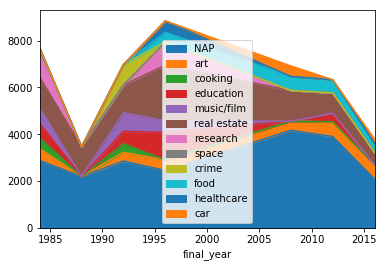

In [22]:
categ_ot.plot.area()
plt.show()

In [31]:
(df[df['categ']!='NAP']
 .append(final_article_df.rename(columns = {'pct_column':'categ'}))
 .to_csv('../data/articles_categs_nap_filled.csv')
)